In [1]:
!pip install keras==2.2.4
!pip install tensorflow==1.14
!pip install tensorflow-gpu==1.14
!pip install numpy=1.16.1

     |████████████████████████████████| 312 kB 4.2 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.2.4 which is incompatible.
     |████████████████████████████████| 109.3 MB 47 kB/s 
     |████████████████████████████████| 488 kB 63.0 MB/s 
     |████████████████████████████████| 3.1 MB 21.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Unins

In [2]:
import keras
keras.__version__

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

'2.2.4'

In [3]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

(batch_size, time_steps, input_features) 크기의 입력을 받음(시퀀스 배치를 처리)

출력은 각 타임 스텝의 출력을 모은 전체 시퀀스를 반환하는 경우는(return_sequences=True)

(batch_size, time_steps, output_features) 크기의 출력 반환

입력 시퀀스에 대한 마지막 출력만 반환하는 경우는(return_sequences=False)

(batch_size, output_features) 크기의 출력 반환




In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


임베딩 층에 의해 각 단어가 32개의 노드로 32 차원 워드 임베딩 됨.

입력 : (batch_size, max_features)

출력 : (batch_size, maxlen, embedding)

참고

![image](https://user-images.githubusercontent.com/44194558/137583204-3cd486bc-88f9-45bc-8546-f7e55d6e595c.png)

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [7]:
!wget https://github.com/rickiepark/deep-learning-with-python-notebooks/archive/master.zip
!unzip master.zip
!mv deep-learning-with-python-notebooks-master/datasets ./

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9115_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9116_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9117_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9118_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9119_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/911_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9120_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9121_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9122_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsu

In [8]:
import os

data_dir = '/content/datasets/jena_climate/'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

# 14개 변수에 대한 관측치가 10분마다 기록 (총 420551개)
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [9]:
lines[0]

'01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30'

In [10]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [11]:
float_data.shape

(420551, 14)

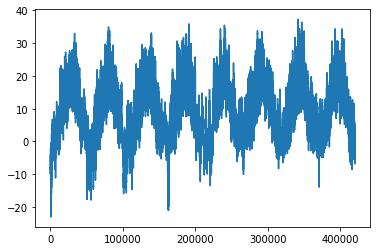

In [12]:
from matplotlib import pyplot as plt

temp = float_data[:, 1]  # 온도(섭씨)
plt.plot(range(len(temp)), temp)
plt.show()

### 기온 예측 문제

최근 몇 일치 데이터를 입력으로 사용해 24시간 이후의 기온을 예측

* lookback = 1440 : 10일전 데이터로 돌아가기 (하루의 타임스텝은 10분, 24x6x10)
* steps = 6 : 한 시간마다 데이터 포인트 하나를 샘플링
* delay = 144 : 24시간 이후의 데이터가 타깃

1. lookback 만큼 이전으로 돌아가서 매 steps 타임스텝마다 샘플링
2. delay 타임스텝 이후의 온도를 예측




In [13]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

* `data` : 정규화한 부동 소수 데이터로 이루어진 원본 배열
* `lookback` : 입력으로 사용하기 위해 거슬러 올라갈 타임스텝
* `delay` : 타깃으로 사용할 미래의 타임스텝
* `min_index`와 `max_index` : 추출할 타임스텝의 범위를 지정하기 위한 `data` 배열의 인덱스. 검증 데이터와 테스트 데이터를 분리하는 데 사용
* `shuffle` : 샘플을 섞을지 시간 순서대로 추출할지 결정. 전체 훈련 데이터를 순서대로 학습하는 것보다 랜덤하게 선택한 샘플을 사용하여 가설 공간의 다양성을 탐색하면 지역 최솟값을 벗어나기 쉽고, 과대적합을 방지할 수 있음(SGD의 아이디어). 시계열 데이터이기 때문에 전체를 섞는 대신 임의의 위치에서 시퀀스를 추출
* `batch_size` : 배치의 샘플 수
* `step` : 데이터를 샘플링할 타임스텝 간격. 한 시간에 하나의 데이터 포인트를 추출하기 위해 6으로 지정.




In [14]:
# float_data 배열을 받아 과거 데이터의 배치와 미래 타깃 온도를 추출하는 파이썬 제너레이터
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    
    # 데이터의 마지막 인덱스가 타깃으로 사용될 수 있도록 지정
    if max_index is None:
        max_index = len(data) - delay - 1
    
    # min_index로부터 10일
    i = min_index + lookback

    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        
        targets = np.zeros((len(rows),))

        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]

        yield samples, targets

#### 코드 보충 설명

In [19]:
# 훈련 제네레이터는 처음 200000개 타임 스텝만 이용 (검증, 테스트와 겹치지 않도록)
min_index = 0
max_index = 200000 
lookback = 1440
delay = 144
step = 6
batch_size = 128

# data의 길이는 420551, 마지막 인덱스는 420550
data = float_data
len(data)

420551

In [21]:
# 데이터의 최종 인덱스가 마지막 타깃이 될 수 있도록 설정(테스트 제네레이터용)
print(len(data) - delay - 1)
print(len(data) - 1)

420406
420550


In [22]:
# min_index + lookback, max_index 범위에서 batch_size 만큼의 임의의 정수를 순서 상관없이 추출
np.random.randint(min_index + lookback, max_index, size=batch_size)

array([160868, 197479, 165182, 114177,   1790,  17595, 102293,  65789,
         9042, 118938,  31596, 153278, 198796,  23806, 173891,  69450,
        76607, 114619, 161531, 196516,  24885,  57545,  98447,  41159,
       134921, 116109,  96002,  86054,  15535,   2706, 166352,  75097,
       175802,  58926, 146788,  91156, 174923,  88828, 157748,  63079,
       113979,  63896, 194342,  10375, 132783,  68586, 180757,  22678,
       108064,   5236, 100815,  93421,  99435,  13405,  66212, 137797,
        19592, 103537,  38165, 151049,  30616, 103016, 100346,  54216,
       156938,  55966, 127704,  76052, 188890, 155987, 179385,  80330,
       107747,  60759,  33245,  59224,  32009,  17535, 125639,  72186,
        13903,  30143, 113991,  47574, 100132, 111042, 120897,  86760,
       129391, 191845, 152432,  24147,  41739,  52463, 156179, 195730,
        10738,  19206,  16105, 127974,  65602, 166067, 133523, 126998,
        88424, 133199, 159389, 134325,   2511, 157702, 198351,  85081,
      

In [24]:
# 기준 시점으로 부터 loockback 타임 스텝(1440) 만큼의 과거 데이터를 조회할 때, 그 만큼의 데이터가 모두 존재할 수 있도록
# ex) 1300 스텝에서 1440만큼 과거로 가면 마이너스 인덱스 (데이터 x)
i = min_index + lookback
rows = np.arange(i, min(i + batch_size, max_index))
i += len(rows)

# i(1440)부터 시작해서 1567까지 batch_size(128)개 만큼의 인덱스를 추출
# 128개 만큼의 기준 시점 추출
# i는 1568 = 1440 + 128 로 업데이트
print(rows)
print(len(rows))

[1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453
 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467
 1468 1469 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481
 1482 1483 1484 1485 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495
 1496 1497 1498 1499 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509
 1510 1511 1512 1513 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523
 1524 1525 1526 1527 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537
 1538 1539 1540 1541 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551
 1552 1553 1554 1555 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565
 1566 1567]
128


In [30]:
samples = np.zeros((len(rows),  # batch_size
                    lookback // step,  # 하나의 타임스텝이 10분인 10일치 데이터에서 한 시간 마다 데이터 포인트 하나를 샘플링
                    data.shape[-1]))  # 14개 관측치 
targets = np.zeros((len(rows),))

print(samples.shape)
print(targets.shape)

(128, 240, 14)
(128,)


In [40]:
j = 0  # 첫 번째 배치
row = 1461

# 하나의 타임스텝이 10분인 10일치 데이터에서 한 시간 마다 데이터 포인트 하나를 샘플링
# 현 시점 : row, lookback 타임 스텝 만큼 (1440) 과거로 돌아가서 현 시점 까지 한 시간 마다 샘플링
indices = range(1461 - lookback, 1461, step)
print('indices :', indices)

samples[j] = data[indices]
targets[j] = data[rows[j] + delay][1]

print(samples[0])
print(targets[0])

indices : range(21, 1461, 6)
[[ 0.9685402  -2.02624691 -2.08039878 ... -1.21106703 -1.20974035
  -0.30615454]
 [ 0.98504879 -2.08159852 -2.13624448 ... -1.13948341 -1.15396247
  -0.82224198]
 [ 1.02749945 -2.14485749 -2.20214239 ... -1.0744074  -1.1024752
  -1.33348027]
 ...
 [ 1.62298785 -2.25217182 -2.35069194 ... -1.23709743 -1.26122763
  -0.0267515 ]
 [ 1.63713807 -2.40580075 -2.50370914 ... -1.0678998  -1.1024752
  -1.55538633]
 [ 1.71024754 -2.39450451 -2.49700766 ... -1.15900622 -1.20974035
  -1.05777182]]
-2.0273765389118172


#### 학습용, 검증용, 테스트용 제네레이터 생성

In [34]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

# 처음 200000개 타임 스텝 이용
train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)

# 그 다음 100000개 사용
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [ ]:
# 머신 러닝 모델이 뛰어 넘어야 할 기준점 
# 24시간 이후의 온도는 지금과 동일하다고 예측
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        # 반복자로부터 반환되는 모든 값 반환
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


#### 기준점 보충

In [48]:
# 첫 번째 val step의 데이터 배치
# ex) samples는 21, 27, 33, ..., 1461 시점들, targets는 1461 + 144시점 (24시간 이후)
samples, targets = next(val_gen)
print(samples.shape)
print(targets.shape)

(128, 240, 14)
(128,)


In [51]:
# 14개 관측치 변수 중 온도의 인덱스 : 1
# 128개의 배치에 대해 제일 마지막 시점(기준 시점)의 온도 데이터만 가져오기
# ex) 지금 시점 : 1461 = samples에서 제일 마지막 시점
preds = samples[:, -1, 1]
print(preds.shape)
print(preds)

(128,)
[ 0.14489141  0.10196568  0.06807694  0.03079933 -0.01325603 -0.04827439
 -0.08216312 -0.11266298 -0.13525547 -0.1318666  -0.14768134 -0.16462571
 -0.18834783 -0.20077369 -0.22110694 -0.23240318 -0.23918093 -0.26064379
 -0.27645854 -0.29453253 -0.31486577 -0.33858789 -0.36118038 -0.37699512
 -0.36795812 -0.36343963 -0.37247662 -0.39168024 -0.39280986 -0.39280986
 -0.39393949 -0.40071723 -0.4131431  -0.40975423 -0.42556897 -0.45042071
 -0.50238344 -0.53966105 -0.57242016 -0.56903129 -0.59162378 -0.62438289
 -0.66504937 -0.62438289 -0.56338316 -0.56112392 -0.59388303 -0.61760514
 -0.657142   -0.74525271 -0.80851169 -0.86273366 -0.84240042 -0.70232698
 -0.62438289 -0.62890139 -0.65940125 -0.71362323 -0.67069749 -0.56112392
 -0.62438289 -0.65488275 -0.64471613 -0.65036425 -0.62212364 -0.64019763
 -0.61986439 -0.60517927 -0.6063089  -0.61760514 -0.61873477 -0.60743852
 -0.59953115 -0.59614228 -0.58936453 -0.58936453 -0.58597566 -0.57693866
 -0.57354979 -0.57580903 -0.57467941 -0.5803

In [58]:
samples[0, -1, 1]

0.14489140728388836

![image](https://user-images.githubusercontent.com/44194558/137613437-939ea2d4-69dc-4657-9d6d-108cafe27f19.png)

In [59]:
print(lookback // step, float_data.shape[-1])

(240, 14)

### 기본 모델

In [61]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))  # 240 x 14
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 16s 32ms/step - loss: 1.3669 - val_loss: 0.8957
Epoch 2/20
500/500 [==============================] - 16s 32ms/step - loss: 0.4557 - val_loss: 0.3529
Epoch 3/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2966 - val_loss: 0.2969
Epoch 4/20
500/500 [==============================] - 15s 31ms/step - loss: 0.2711 - val_loss: 0.3386
Epoch 5/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2583 - val_loss: 0.3470
Epoch 6/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2499 - val_loss: 0.3257
Epoch 7/20
500/500 [==============================] - 16s 31ms/step - loss: 0.2410 - val_loss: 0.3278
Epoch 8/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2362 - val_loss: 0.3244
Epoch 9/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2300 - val_loss: 0.3182
Epoch 10/20
500/500 [==============================] - 16s 32ms/step - loss: 0.226

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3360)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                107552    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________


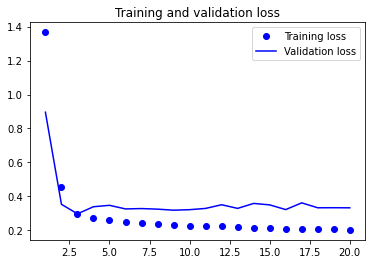

In [64]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### GRU

In [69]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))  # None x 14
model.add(layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 32)                4512      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


실제 GRU 은닉층을 추가하는 코드 : 
model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))

### GRU with 순환 드롭아웃

타임 스텝마다 랜덤하게 드롭아웃 마스크를 변경하는 것이 아니라, 동일한 드롭아웃 마스크를(동일한 유닛의 드롭 패턴) 모든 타임 스텝에 적용해야 함. 드롭아웃이 타임 스텝마다 랜덤하게 적용되면 오차 신호가 전파되는 것을 방해함. 

* dropout : 층의 입력에 대한 드롭 아웃 비율
* recurrent_dropout : 순환 상태의 드롭 아웃 비율

In [67]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

### 스태킹 순환

성능 상의 병목을 해결하기 위해 네트워크의 용량을 늘리기. 과대적합이 일어날 때 까지 네트워크의 용량을 늘리는 것이 좋음. (너무 많이 과대적합 되지 않는 한 아직 충분한 용량에 도달한 것이 아님)

층의 유닛 수를 늘리거나 층을 더 쌓아 더 강력한 네트워크를 구축

순환 층을 차례대로 쌓으려면 모든 중간 층은 전체 시퀀스(3D 텐서)를 출력해야 함. 
return_sequence=True를 적용하여 시간 스텝 만큼의 은닉층을 다음 층의 입력으로 전달

return_state=True : 마지막 시점의 상태 벡터를 다음 층에 전달

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))

model.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))

model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

### 양방향 RNN

시퀀스를 양쪽 방향으로 처리. 자연어 처리에서 뛰어난 효과

In [ ]:
def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1

    i = min_index + lookback

    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
            
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        
        # 시간 순서를 역방향으로
        yield samples[:, ::-1, :], targets

In [ ]:
train_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step, 
    batch_size=batch_size)

val_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)

In [ ]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용)
maxlen = 500

# 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 시퀀스 뒤집기
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# 시퀀스에 패딩 추가
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

텍스트 데이터에서는 시퀀스를 뒤집어 처리해도 괜찮은 성능. 양방향 RNN은 이 아이디어를 사용하여 시간 순서대로 처리하는 RNN의 성능을 향상시킴. 입력 시퀀스를 양쪽으로 처리하기 때문에, 다양한 표현을 학습할 수 있음. ((시간 순서대로 처리할 때 놓칠 수 있는 패턴을 학습)

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

#### 양방향 순환 신경망 - 온도 예측 문제

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(
    layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)